#Juan Carlos Apitz
#STAT510 Homework 2

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

import statsmodels.formula.api as sm

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

##Problem 1.22

First load the data set for the plastic hardness data

In [2]:
df = pd.read_table('~/Documents/LinearRegression/STAT510/Kutner/CH1DS/CH01PR22.txt',
                   delim_whitespace=True, names=['hardness','hours'])

In [3]:
df.head()

,hardness,hours
0,199,16
1,205,16
2,196,16
3,200,16
4,218,24


Next we fit the model

In [4]:
model = sm.ols(formula="hardness ~ hours", data=df).fit()

###Part a.

The table below summarizes the results of fitting the model to plastic hardness data:

In [5]:
print model.summary()

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     506.5
Date:                Tue, 15 Sep 2015   Prob (F-statistic):           2.16e-12
Time:                        13:25:59   Log-Likelihood:                -40.414
No. Observations:                  16   AIC:                             84.83
Df Residuals:                      14   BIC:                             86.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    168.6000      2.657     63.454      0.0

/home/jcapitz/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


#####The estimated regression function is:

$\hat{y} = 168.6 + 2.0344x$

Where $\hat{y}$ represents the estimated hardness and $x$ represents the elapsed time in hours.

#####Plot of the estimated regression function and the data:

The plot indicates that the data fits reasonably well the linear model represented by the regression function.

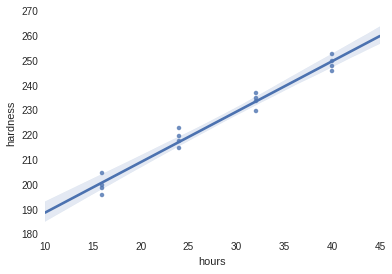

In [6]:
ax = sns.regplot(x="hours", y="hardness", data=df)

###Part b.

To obtain a point estimate of the mean hardness when X = 40 hours, we simply let X = 40 be the input into the estimated regression function:

In [7]:
x = DataFrame({'hours':40}, index = range(1))

print model.predict(x)[0]

249.975


###Part c.

The point estimate of the change in mean hadness when X is increased by one hour is simply the estimated coefficient for the X variable (hours) from the estimated regression function:

In [8]:
print model.params['hours']

2.034375


##Problem 1.26

###Part a.

Obtain resisuals and check wether the sum adds to 0:

In [9]:
model.resid

0    -2.150
1     3.850
2    -5.150
3    -1.150
4     0.575
5     2.575
6    -2.425
7     5.575
8     3.300
9     0.300
10    1.300
11   -3.700
12    0.025
13   -1.975
14    3.025
15   -3.975
dtype: float64

Below we can see that the sum of the residuals is nearly zero:

In [10]:
print sum(model.resid)

4.54747350886e-13


###Part b.

A point estimate of the variance is given by:
$$\hat{\sigma}^2 = \frac{\sum \left( y_i - \hat{y}_i \right)^2}{n-2}$$

The point estimate of the variance is calculated below:

In [11]:
variance = sum(model.resid**2)/14

print variance

10.4589285714


The estimate for sigma is given by:

$$\hat{\sigma} = \sqrt{\frac{\sum \left( y_i - \hat{y}_i \right)^2}{n-2}}$$

Sigma is expressed in Brinell units and is calculated below:

In [12]:
stdev = np.sqrt(variance)

print stdev

3.23402668069


##Problem 1.31

##Problem 2.7

We can calculate the standard error of the $b_1$ coefficient or read it of the summary table.

$$SE(b_1)=\frac{\hat{\sigma}}{\sqrt{\sum\left(x_i - \bar{x}\right)}}$$

In [13]:
stderr_beta1 = np.sqrt(variance/sum((df['hours']-np.mean(df['hours']))**2))

print stderr_beta1

0.0903937937384


###Part a.

Now we obtain the critical value $t_{\alpha/2,n-2}$ by finding the inverse $\alpha/2=CDF = 0.005$ value from the t-distribution with $14$ degrees of freedom:

In [14]:
from scipy.stats import t

tcrit = abs(t.ppf(0.005, 14, loc=0, scale=1))

print tcrit

2.97684273411


Now we can construct an 99% interval for $b_1$. This interval is given by:

$$b_1 \pm t_{0.005,14}SE(b_1)$$

In [15]:
print [model.params[1]-tcrit*stderr_beta1, model.params[1]+tcrit*stderr_beta1]

[1.7652868919008251, 2.3034631080991628]


###Part b.

The hypothesis test is as follows:

$H_o: b_1 = 2$

$H_a: b_1 \neq 2$

The decision rule is that if $\left|t_{stat}\right|>\left|t_{0.005,14}\right|$, we would reject the null hypothesis $H_o$ and fail to reject $H_o$ otherwise. We calculate $t_{stat}$ below:

In [16]:
tstat = (model.params[1]-2)/stderr_beta1

print tstat

0.380280532306


Since $\left|t_{stat}\right|<\left|t_{0.005,14}\right|$ we fail to reject Ho.

The p-value is given below:

In [17]:
pval = t.cdf(tstat,14)

print pval

0.645277772115
